In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]

In [0]:
X = np.array(senator_df.values[:, 3:].T, dtype='float64')

In [3]:
affiliations = af["affiliations"]
print(affiliations)
aff_list = list(affiliations)

0      Red
1     Blue
2     Blue
3     Blue
4     Blue
      ... 
95    Blue
96    Blue
97     Red
98     Red
99     Red
Name: affiliations, Length: 100, dtype: object


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(affiliations)
print(le.classes_)
cat = le.transform(affiliations)

['Blue' 'Red' 'Yellow']


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.predict(X)

In [6]:
errors = []
for i in range(0,100):
  if cat[i]!=labels[i]:
    errors.append(i)
print(errors)    

[21, 34, 58, 62]


Senators that were misclassified

In [7]:
error_list = []
for i in errors:
  error_list.append(af[0][i])
print(error_list)  

['Nelson Blue', 'Jeffords Yellow', 'Chafee Red', 'Dayton Yellow']


> These senators were misclassified because kmeans forms cirular clusters and the data points of these senators were not within this circular cluster boundary. That is K means is quite sensitive to outliers. 


The results can be visualized by plotting data in a space of reduced dimensions

In [0]:
X_mean = np.mean(X, axis = 0)
X_original = X.copy()
X = X - np.mean(X, axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

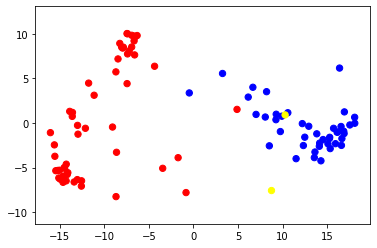

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
labels = kmeans.fit(projected).predict(projected)
plt.scatter(projected[:, 0], projected[:, 1], c=affiliations, s=40, cmap='viridis');
ax = plt.gca()
ax.axis('equal')
plt.show();

Misclassified senators

In [17]:
repub = np.where(affiliations=='Red')
repub = np.squeeze(repub)
sen_id = np.where(projected[repub,0] >= 0)
print(af[0][repub[sen_id]])

repub = np.where(affiliations=='Blue')
repub = np.squeeze(repub)
sen_id = np.where(projected[repub,0] <= 0)
print(af[0][repub[sen_id]])

repub = np.where(affiliations=='Yellow')
repub = np.squeeze(repub)
print(af[0][repub])

58    Chafee Red
Name: 0, dtype: object
21    Nelson Blue
Name: 0, dtype: object
34    Jeffords Yellow
62      Dayton Yellow
Name: 0, dtype: object
